In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
from collections import defaultdict
from collections import Counter
from collections import OrderedDict
import numpy as np




In [6]:
df = pd.read_csv("../workflows/2_7_13_3/csv/2_7_13_3_uniprot.csv")

df[['Entry', 'Cross_reference_SMART']].dropna()

,Entry,BRENDA_REFERENCES_1,BRENDA_REFERENCES_1_PUBMED,BRENDA_REFERENCES_2,BRENDA_REFERENCES_2_PUBMED,BRENDA_REFERENCES_3,BRENDA_REFERENCES_3_PUBMED,BRENDA_REFERENCES_8,BRENDA_REFERENCES_8_PUBMED,BRENDA_REFERENCES_9,...,Cross_reference_UCSC,Cross_reference_UniLectin,Cross_reference_UniPathway,Cross_reference_VEuPathDB,Cross_reference_VGNC,Cross_reference_WBParaSite,Cross_reference_World_2DPAGE,Cross_reference_WormBase,Cross_reference_Xenbase,Cross_reference_ZFIN
0,Q2YKK7,"Klein, C.; Entian, K.D.: Genes involved in sel...",8085823,"Roberts, D.L.; Bennett, D.W.; Forst, S.A.: Ide...",8132603.0,"Pernestig, A.K.; Georgellis, D.; Romeo, T.; Su...",12533459,"Nagasawa, S.; Tokishita, S.; Aiba, H.; Mizuno,...",1574005,"Pernestig, A.K.; Melefors, O.; Georgellis, D.:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G3XD98,"Klein, C.; Entian, K.D.: Genes involved in sel...",8085823,NaN,NaN,"Pernestig, A.K.; Georgellis, D.; Romeo, T.; Su...",12533459,"Nagasawa, S.; Tokishita, S.; Aiba, H.; Mizuno,...",1574005,"Pernestig, A.K.; Melefors, O.; Georgellis, D.:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q9HX42,"Klein, C.; Entian, K.D.: Genes involved in sel...",8085823,NaN,NaN,"Pernestig, A.K.; Georgellis, D.; Romeo, T.; Su...",12533459,"Nagasawa, S.; Tokishita, S.; Aiba, H.; Mizuno,...",1574005,"Pernestig, A.K.; Melefors, O.; Georgellis, D.:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q2G2U4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q55586,NaN,NaN,"Roberts, D.L.; Bennett, D.W.; Forst, S.A.: Ide...",8132603.0,NaN,NaN,"Nagasawa, S.; Tokishita, S.; Aiba, H.; Mizuno,...",1574005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Q56128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,Q8Z332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,Q48828,"Klein, C.; Entian, K.D.: Genes involved in sel...",8085823,NaN,NaN,"Pernestig, A.K.; Georgellis, D.; Romeo, T.; Su...",12533459,"Nagasawa, S.; Tokishita, S.; Aiba, H.; Mizuno,...",1574005,"Pernestig, A.K.; Melefors, O.; Georgellis, D.:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,Q47745,"Klein, C.; Entian, K.D.: Genes involved in sel...",8085823,NaN,NaN,"Pernestig, A.K.; Georgellis, D.; Romeo, T.; Su...",12533459,"Nagasawa, S.; Tokishita, S.; Aiba, H.; Mizuno,...",1574005,"Pernestig, A.K.; Melefors, O.; Georgellis, D.:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Show all columns
pd.set_option('display.max_columns', None)

In [44]:
[print (x)for x in df.columns if "BRENDA_REFERENCES" not in x]


Entry
BRENDA_MW_DATA
BRENDA_MW_REFS
BRENDA_MW_COMMENT
BRENDA_SY_DATA
BRENDA_SY_REFS
BRENDA_CL_DATA
BRENDA_CL_REFS
BRENDA_EN_DATA
BRENDA_EN_REFS
BRENDA_EN_COMMENT
BRENDA_NSP_DATA
BRENDA_NSP_REFS
BRENDA_NSP_COMMENT
BRENDA_SP_DATA
BRENDA_SP_REFS
BRENDA_SP_COMMENT
BRENDA_ST_DATA
BRENDA_ST_REFS
BRENDA_ST_COMMENT
BRENDA_LO_DATA
BRENDA_LO_REFS
BRENDA_LO_COMMENT
BRENDA_CF_DATA
BRENDA_CF_REFS
BRENDA_CF_COMMENT
BRENDA_AC_DATA
BRENDA_AC_REFS
BRENDA_AC_COMMENT
BRENDA_PHO_DATA
BRENDA_PHO_REFS
BRENDA_PHO_COMMENT
BRENDA_PU_DATA
BRENDA_PU_REFS
BRENDA_TO_DATA
BRENDA_TO_REFS
BRENDA_TO_COMMENT
BRENDA_IN_DATA
BRENDA_IN_REFS
BRENDA_IN_COMMENT
BRENDA_SU_DATA
BRENDA_SU_REFS
BRENDA_SU_COMMENT
BRENDA_AP_DATA
BRENDA_AP_REFS
BRENDA_AP_COMMENT
BRENDA_ME_DATA
BRENDA_ME_REFS
BRENDA_ME_COMMENT
BRENDA_CR_DATA
BRENDA_CR_REFS
BRENDA_KM_Lys_Lys_Phe_Asn_Arg_Thr_Leu_Ser_Val_Ala_DATA
BRENDA_KM
BRENDA_KM_Lys_Lys_Phe_Asn_Arg_Thr_Leu_Ser_Val_Ala_UNITS
BRENDA_KM_Lys_Lys_Phe_Asn_Arg_Thr_Leu_Ser_Val_Ala_REFS
BRENDA_SA_DATA
BREND

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [41]:
df['BRENDA_IN_DATA']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4      PF670462_count=1
             ...       
330                 NaN
331                 NaN
332                 NaN
333                 NaN
334                 NaN
Name: BRENDA_IN_DATA, Length: 335, dtype: object

# Steps

### Load notebooks / read in files
### Summarise the ten data sets with the most sequences
- Which columns have the most entries
- Which columns are uninformative

Importing data set 

- Iterate through every EC file and check how many entries there are
- Save the EC numbers of the 10 largest files 

In [3]:
#ec_nums = pd.read_csv("../ec_nums.csv")

sys.path.append('../config')

import ec_nums

#grabs the list containing all ec nums 
ec_files = ec_nums.ec_nums

ec_uniprot_counts = {}

for num in ec_files:
    num = num.replace('.','_')

    path =  f"../workflows/{num}/csv/{num}_uniprot.csv"
    
    if os.path.exists(path):
        df = pd.read_csv(path) 
        
        ec_uniprot_counts[num] = df.shape[0]

sorted_ec_counts = sorted(ec_uniprot_counts.items(),key =lambda x: x[1], reverse=True)



        

[('2_7_11_1', 335), ('2_7_13_3', 297), ('2_7_10_2', 203), ('2_7_10_1', 180), ('1_14_99_39', 175), ('2_5_1_18', 147), ('3_2_1_8', 133), ('3_5_2_6', 129), ('1_15_1_1', 117), ('4_1_1_39', 114)]


In [4]:
print(sorted_ec_counts[10:20])

[('3_2_1_4', 110), ('3_2_1_14', 95), ('3_6_5_2', 94), ('2_7_11_22', 93), ('2_4_99_18', 89), ('2_7_11_24', 87), ('2_7_3_3', 86), ('4_2_1_1', 82), ('3_2_1_21', 80), ('2_4_1_207', 79)]


# The top 10 EC groups

2_7_11_1: non-specific serine/threonine protein kinase

2_7_13_3: histidine kinase

2_7_10_2: non-specific protein-tyrosine kinase

2_7_10_1: receptor protein-tyrosine kinase

1_14_99_39: ammonia monooxygenase

2_5_1_18: glutathione transferase

3_2_1_8: endo-1,4-beta-xylanase (degrade the linear polysaccharide xylan into xylose - cell wall component)

3_5_2_6: beta-lactamase

1_15_1_1: superoxide dismutase

4_1_1_39: ribulose-bisphosphate carboxylase


In [8]:
ec_top_10 = ['2_7_11_1', '2_7_13_3', '2_7_10_2', '2_7_10_1', '1_14_99_39', '2_5_1_18', '3_2_1_8', '3_5_2_6', '1_15_1_1', '4_1_1_39']

# Filtering relevent columns

- need to go through each BRENDA column and record the number of rows before and after null values are removed 
- store this information for each type of column and compare to the other 9 ECs 
- start by removing any reference columns 

In [47]:

common = []

ec_holder = []

for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")


    pd.set_option('display.max_columns', None)


    df = df.loc[:,~df.columns.str.startswith('BRENDA_REFERENCES') & ~df.columns.str.contains('REFS')]


    df = df.loc[:,df.columns.str.startswith('Entry') | df.columns.str.startswith('BRENDA')]


    num_rows = df.shape[0]

    col_counts = {}

    for col in df.columns:
        annot_count = df[col].dropna().shape[0]
        percent_annot = (annot_count/num_rows) * 100
        col_counts[col] = round(percent_annot, 2) 

    
    ec_holder.append(col_counts)
    common.append(set(col_counts.keys()))

    
common_cols = common[0].intersection(common[1], common[2], common[3], 
                                    common[4], common[5], common[6],
                                    common[7], common[8], common[9])



#the column headings present in every single annotation 
common_cols


{'BRENDA_CL_DATA',
 'BRENDA_IN_COMMENT',
 'BRENDA_IN_DATA',
 'BRENDA_LO_DATA',
 'BRENDA_ME_COMMENT',
 'BRENDA_ME_DATA',
 'BRENDA_NSP_COMMENT',
 'BRENDA_NSP_DATA',
 'BRENDA_PU_DATA',
 'BRENDA_SP_COMMENT',
 'BRENDA_SP_DATA',
 'BRENDA_SY_COMMENT',
 'BRENDA_SY_DATA',
 'BRENDA_TO_COMMENT',
 'BRENDA_TO_DATA',
 'Entry',
 'Entry_name'}

CL_DATA - mode of expression for the protein (not interesting) 

IN_DATA - Inhibitor compound, annotation could possibly be linked to IC50 value 

LO_data - localisation of the enzyme (not useful) 

ME_data - interacting metals (not useful) 

NSP_data - natural substrate (not useful) 

PU_data - purification method (not useful)

sp_data: substrate/product (not useful)

TO_data: Could be useful, optimal temp of enzyme, some of the annotations imply this is the temperature that the assay was perfomed at so likely not useful 

# What are the possible useful columns and how often are they annotated?

Km value - used the collated column with all entries that Gabe made 

Ki - dissociation constant 

optimal pH (PHO)

Optimal temperature (TO) - might be temp at which assay was performed 

IC50 value - concentration for 50% inhibition 

TN(turnover?) - number of substrates transformed per minute

Isoelectric point (pI value) - can't find that info in df

specific activity(SA) - probably not very useful as just a measure of purity 

Temperature stability (TS?) - more likely to be a useful metric, probably a lot fewer annotations 

In [11]:

def calculate_annots(col_name):

    #half vmax 
    print(col_name)
    average = []

    for ec in ec_top_10:

        df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")

        num_rows = df.shape[0]

        if col_name in df.columns:
                annot_count = df[col_name].dropna().shape[0]
                percent_annot = round((annot_count/num_rows) * 100, 2)
                print(f"{ec} {col_name}: {percent_annot}% of entries annotated")
                average.append(percent_annot)
        else:
            print(f"{ec} does not have {col_name} column")

    print(f"\n{len(average)} out of 10 ec groups have {col_name} values")
    print(f"The average proportion of annots in each group is {round(np.mean(average), 2)}%")

    print("\n")

    
calculate_annots('BRENDA_KM')  

calculate_annots('BRENDA_KI')

# calculate_annots('BRENDA_PHO_DATA')

# calculate_annots('BRENDA_TO_DATA')

# calculate_annots('BRENDA_IC50')

calculate_annots('BRENDA_TN')

# calculate_annots('BRENDA_TS_DATA')

# calculate_annots('Cross_reference_InterPro')


calculate_annots('Cross_reference_eggNOG') 




BRENDA_KM
2_7_11_1 BRENDA_KM: 0.9% of entries annotated
2_7_13_3 does not have BRENDA_KM column
2_7_10_2 does not have BRENDA_KM column
2_7_10_1 BRENDA_KM: 0.56% of entries annotated
1_14_99_39 does not have BRENDA_KM column
2_5_1_18 BRENDA_KM: 25.85% of entries annotated
3_2_1_8 BRENDA_KM: 2.26% of entries annotated
3_5_2_6 BRENDA_KM: 55.04% of entries annotated
1_15_1_1 does not have BRENDA_KM column
4_1_1_39 BRENDA_KM: 71.05% of entries annotated

6 out of 10 ec groups have BRENDA_KM values
The average proportion of annots in each group is 25.94%


BRENDA_KI
2_7_11_1 BRENDA_KI: 0.3% of entries annotated
2_7_13_3 does not have BRENDA_KI column
2_7_10_2 does not have BRENDA_KI column
2_7_10_1 BRENDA_KI: 0.56% of entries annotated
1_14_99_39 does not have BRENDA_KI column
2_5_1_18 BRENDA_KI: 3.4% of entries annotated
3_2_1_8 does not have BRENDA_KI column
3_5_2_6 BRENDA_KI: 14.73% of entries annotated
1_15_1_1 does not have BRENDA_KI column
4_1_1_39 does not have BRENDA_KI column

4 ou

# 1) Pfam value

- Classifies a collection of protein domain families 
- Entries with less than 6 entries get classed within other 

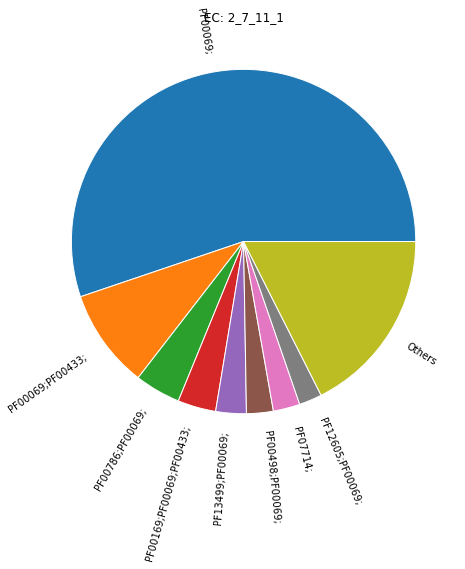

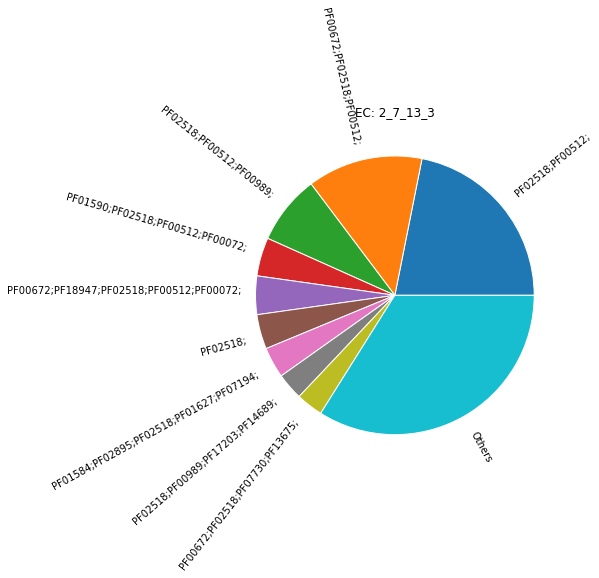

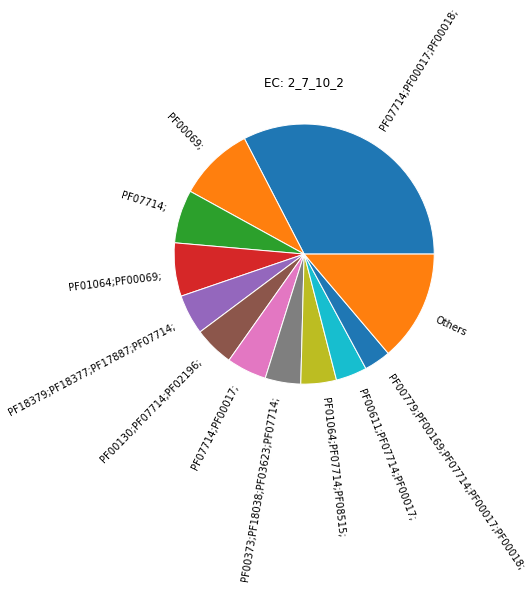

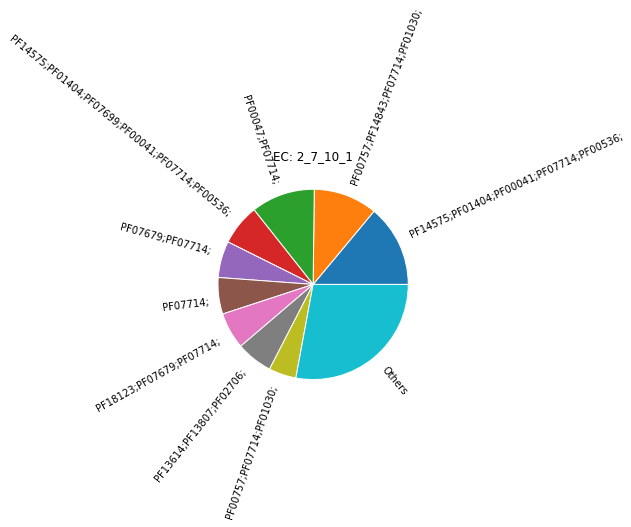

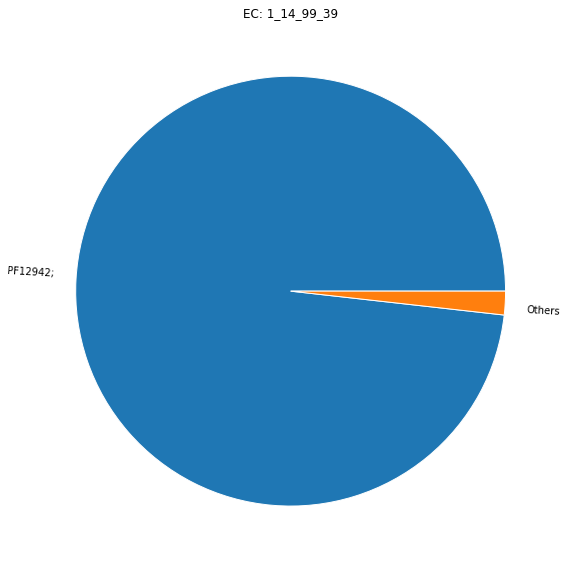

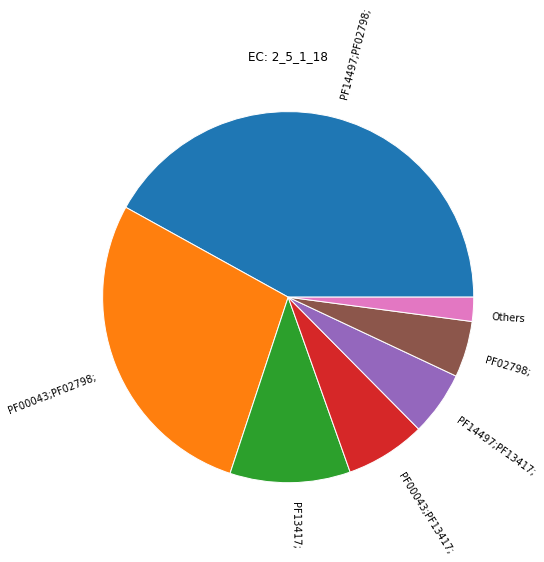

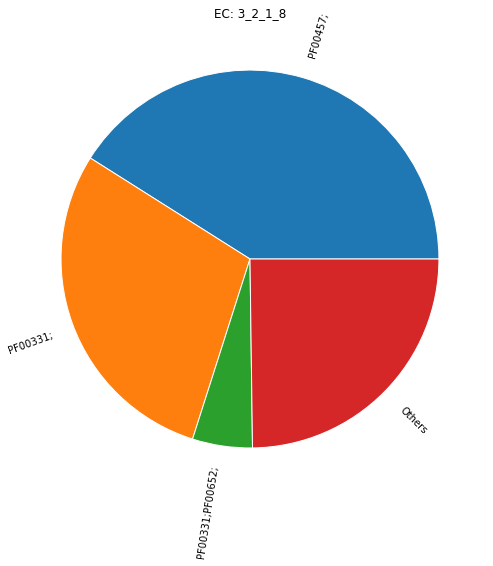

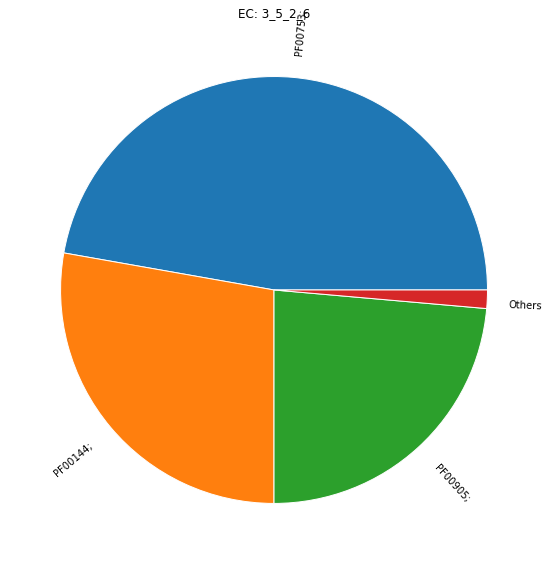

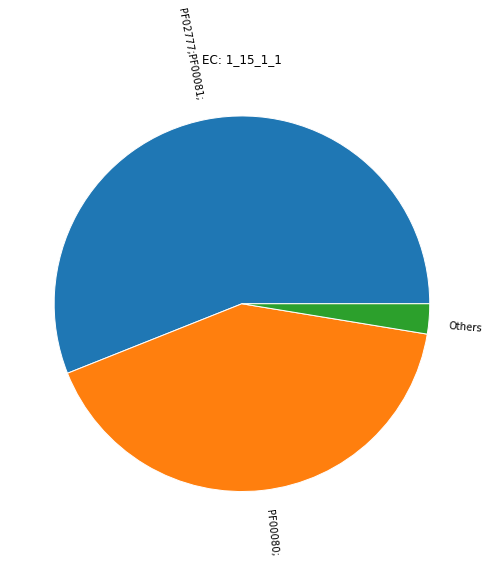

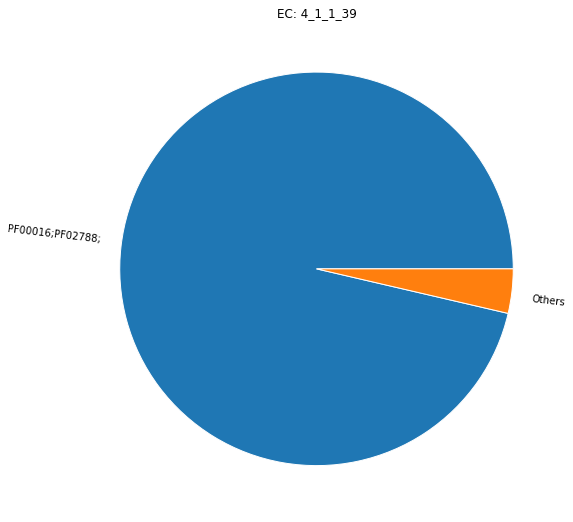

In [6]:
enzyme_cols = ['Entry', 'Cross_reference_Pfam']



for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")
    
    #will count each appearance of particular pfam class 
    counters = defaultdict(int)
    df = df[enzyme_cols]
    pfam_counts = df['Cross_reference_Pfam'].value_counts()

    for index, value in pfam_counts.items():

        if value <= 5:
            counters['Others'] += 1
        else:
            counters[index] = value 


    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(counters.values(), labels = counters.keys(), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},rotatelabels = 45)
    ax.set_title(f'EC: {ec}')
    plt.tight_layout()

# 2) pH optimum value

- the pH at which the enzyme is most active

<class 'list'>


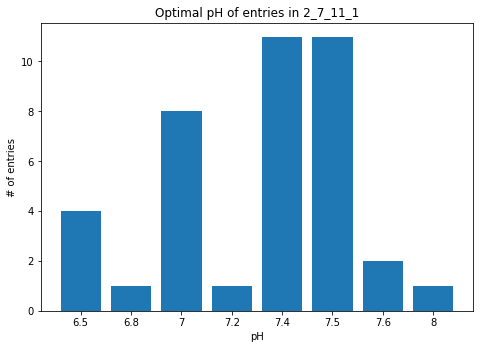

<class 'list'>


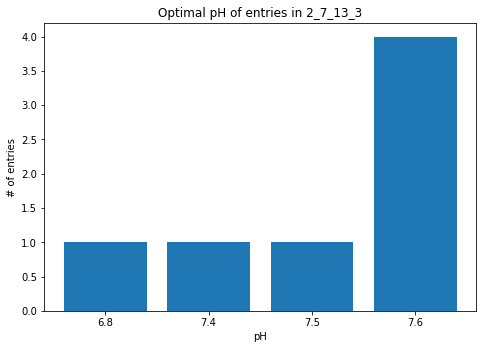

<class 'list'>


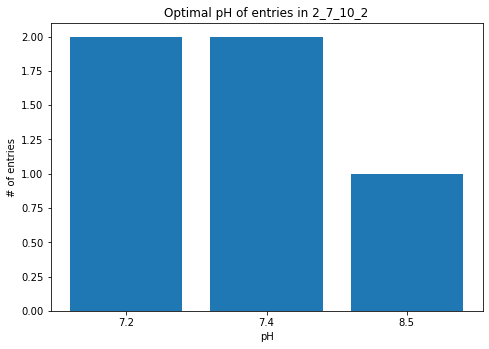

2_7_10_1 does not contain optimal pH values
<class 'list'>


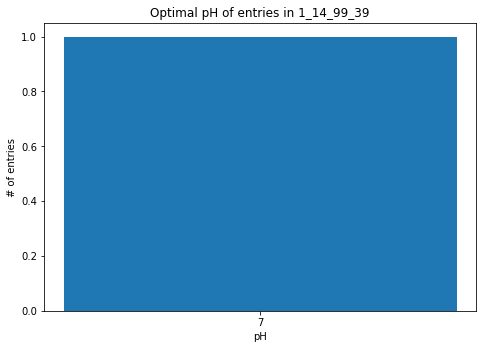

<class 'list'>


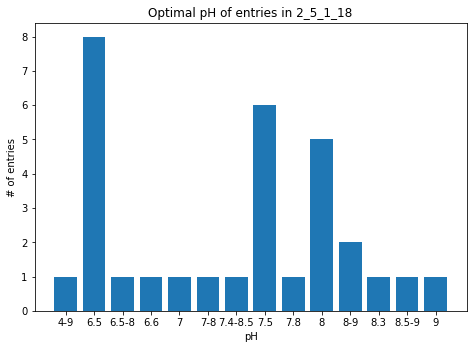

<class 'list'>


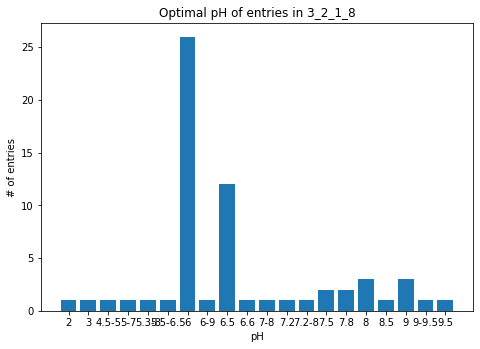

<class 'list'>


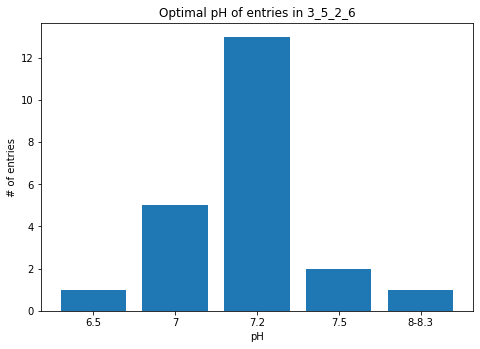

<class 'list'>


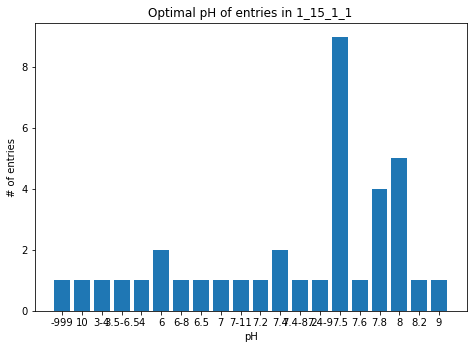

<class 'list'>


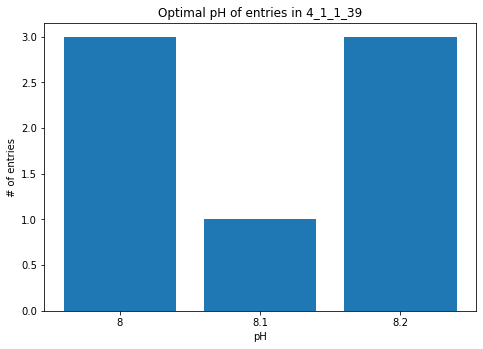

In [5]:
enzyme_cols = ['Entry', 'BRENDA_PHO_DATA']


for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")
    
    if 'BRENDA_PHO_DATA' not in df.columns:
        print(f"{ec} does not contain optimal pH values")
        continue 
    
    df = df[enzyme_cols].dropna()

    ls = df.values.tolist()

    pH_counter = {}

    for entry in ls:

        #separate actual pH from reference count in data 
        pH = entry[1].split('_')[0]

        if pH in pH_counter:
            pH_counter[pH].append(entry[0])
        else:
            #create an entry and add a list with annotation name 
            pH_counter[pH] = [entry[0]]

    ordered_pH = OrderedDict(sorted(pH_counter.items(), key=lambda x: x[0]))
    
    keys = list(ordered_pH.keys())

    values = list(ordered_pH.values())

    pH_counts = []

    for x in values:
        #take the number of entries to plot on the y axis
        pH_counts.append(len(x))
    
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(keys, pH_counts)
    ax.set_xlabel('pH')
    ax.set_ylabel('# of entries')
    ax.set_title(f'Optimal pH of entries in {ec}')
    plt.show()
   
    



In [2]:
df = pd.read_csv("../workflows/2_7_11_1/csv/2_7_11_1_uniprot.csv")
# Show all columns
pd.set_option('display.max_columns', None)

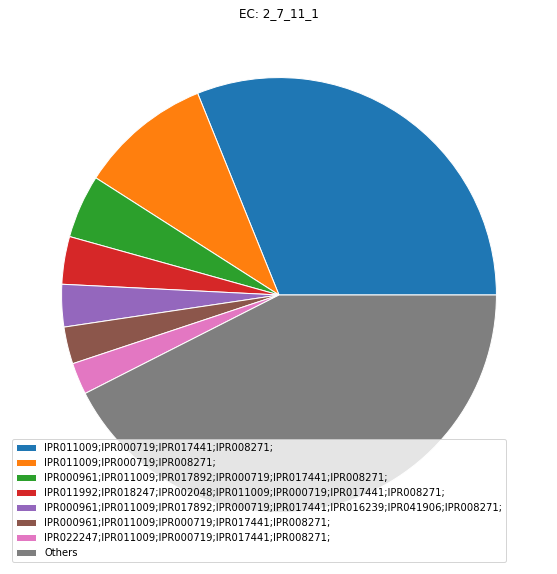

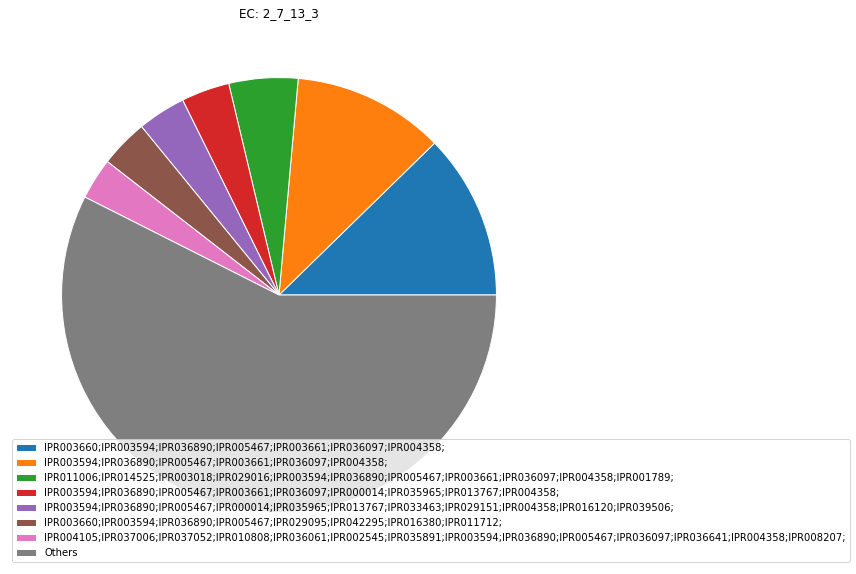

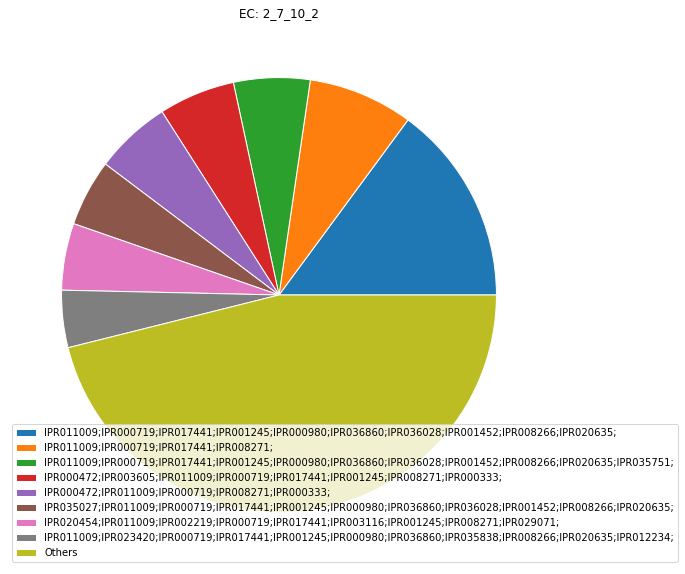

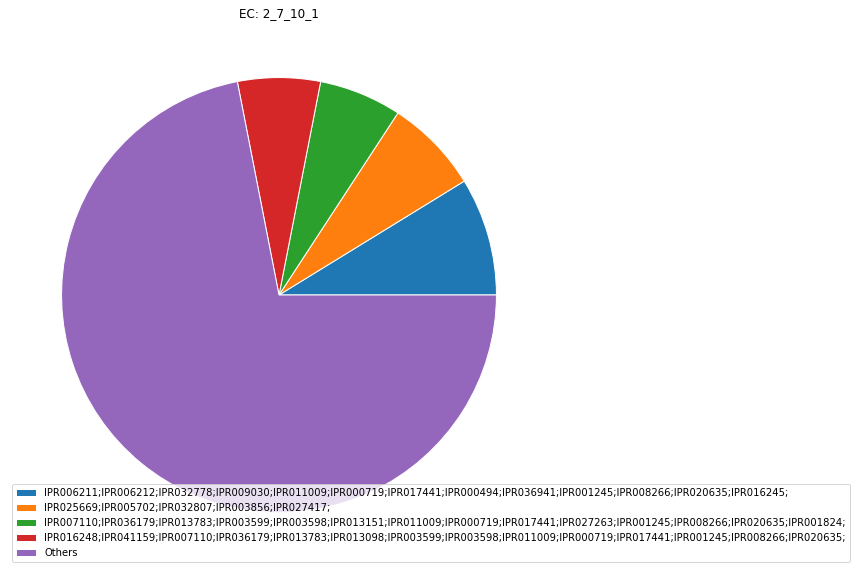

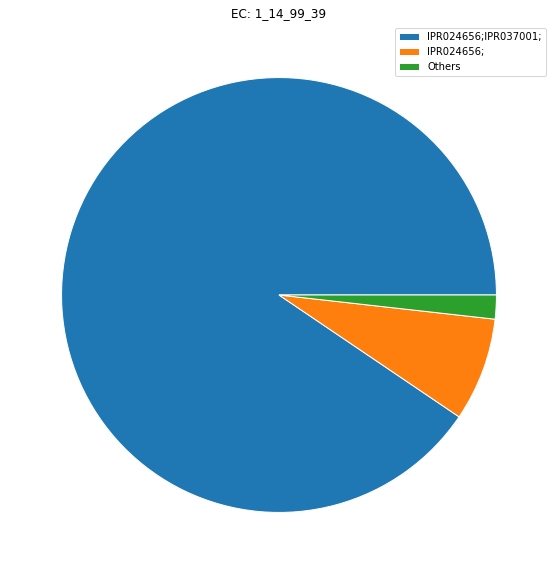

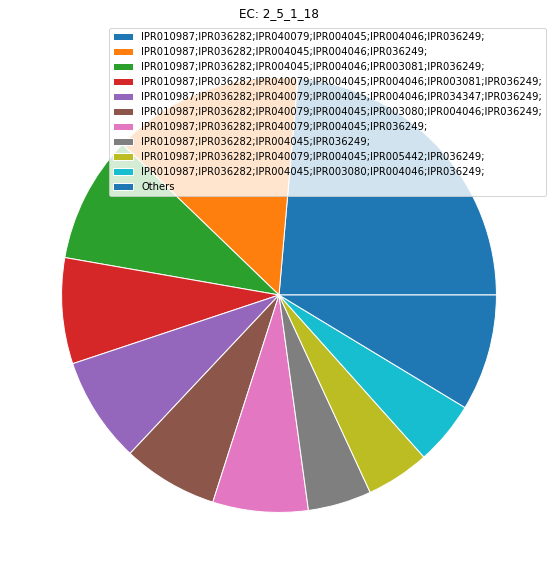

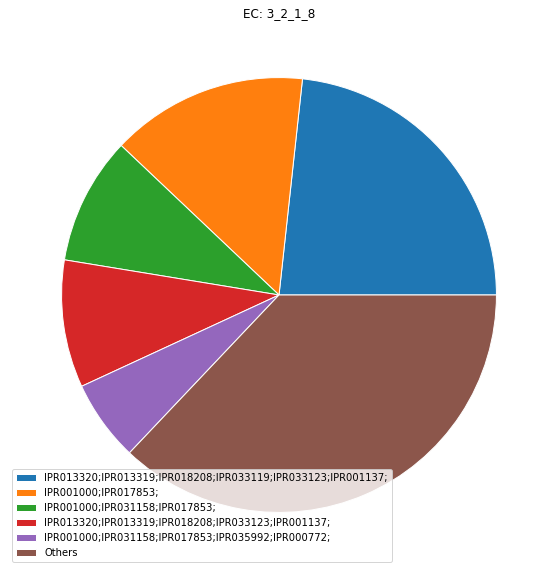

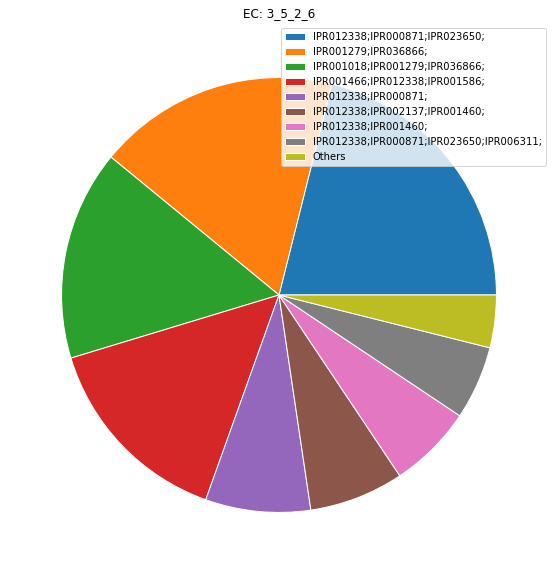

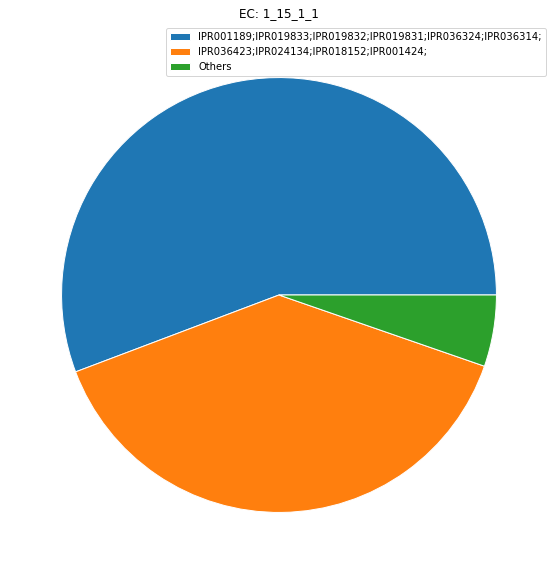

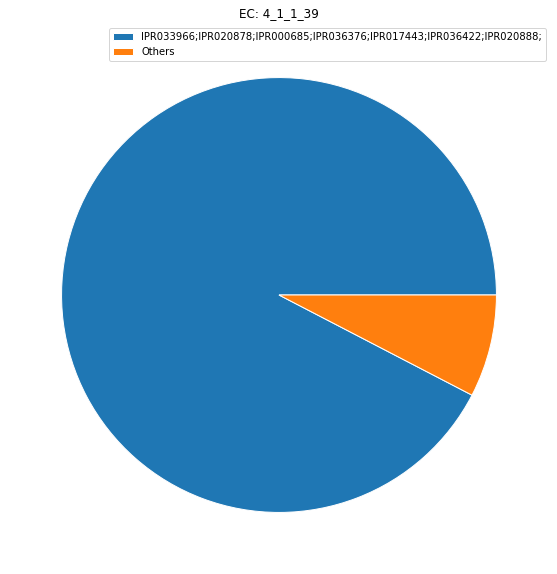

In [23]:

enzyme_cols = ['Entry', 'Cross_reference_InterPro']

for ec in ec_top_10:

    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")

    #will count each appearance of particular pfam class 
    counters = defaultdict(int)

    df = df[enzyme_cols]

    interpro_counts = df['Cross_reference_InterPro'].value_counts()
    #print(interpro_counts)

    for index, value in interpro_counts.items():

        if value <= 5:
            counters['Others'] += 1
        else:
            counters[index] = value 

    fig, ax = plt.subplots(figsize=(10,10))
    ax.pie(counters.values(), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},rotatelabels = 45)
    ax.set_title(f'EC: {ec}')
    plt.legend(counters.keys())
    #plt.tight_layout()


## Examination of single InterPro group to check for homology 

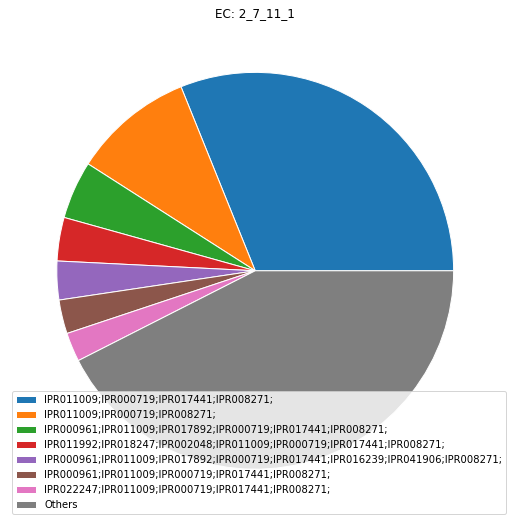

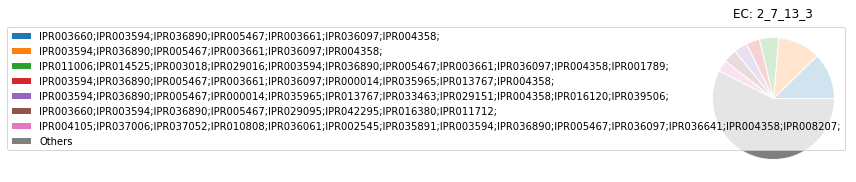

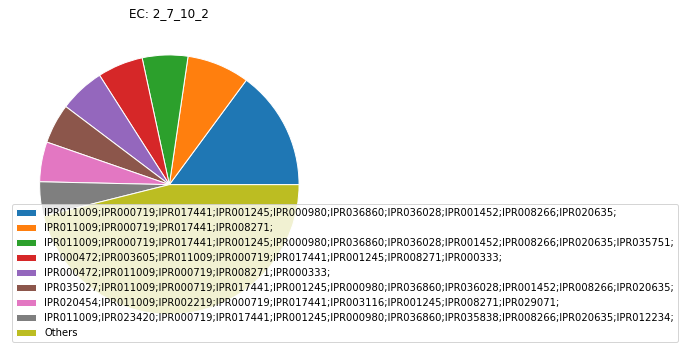

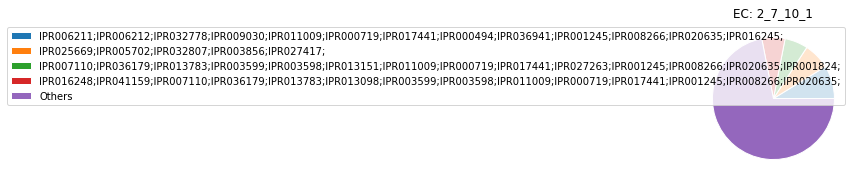

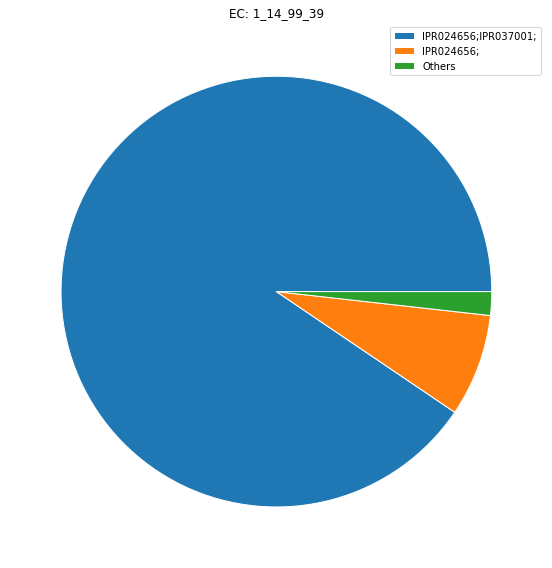

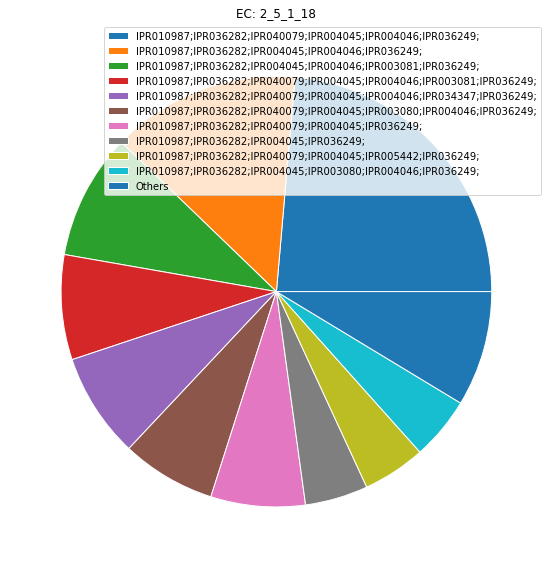

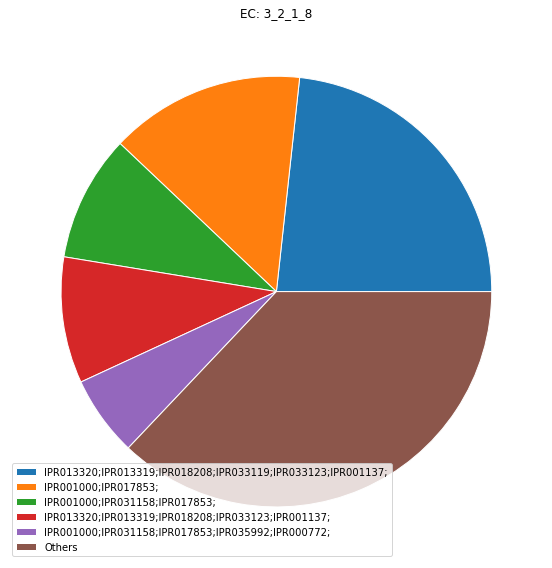

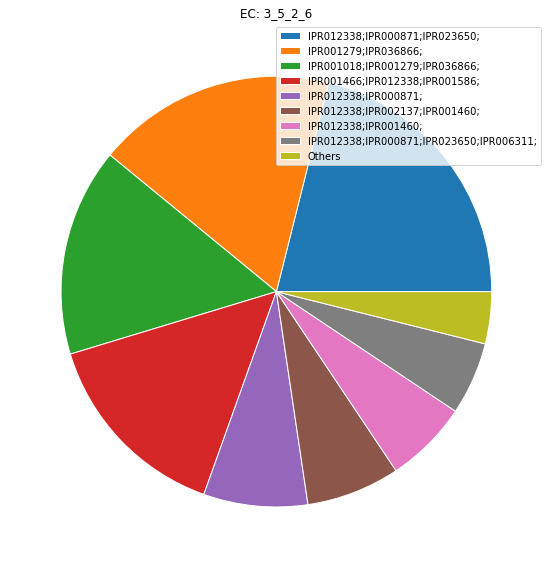

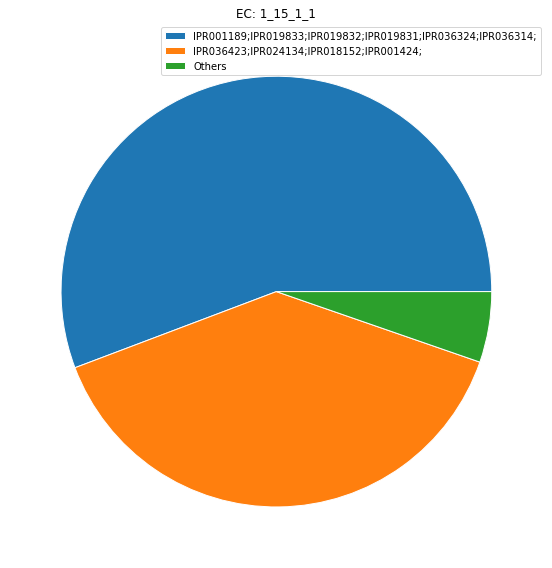

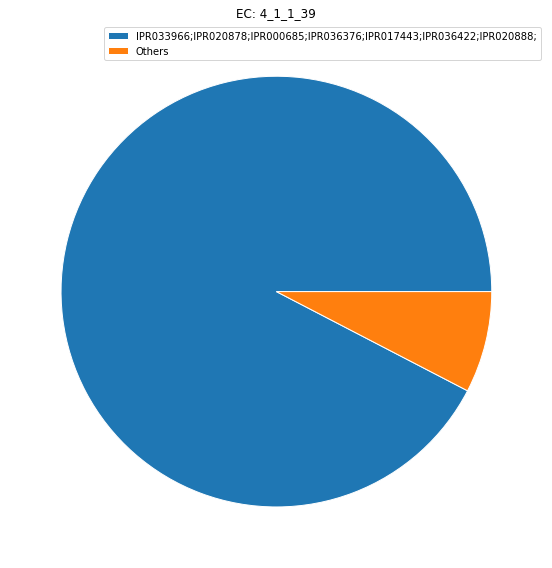

In [5]:
enzyme_cols = ['Entry', 'Cross_reference_InterPro', 'Protein_families']

df = pd.read_csv("../workflows/4_1_1_39/csv/4_1_1_39_uniprot.csv")
# Show all columns
pd.set_option('display.max_columns', None)

df = df[enzyme_cols]

df = df['Protein_families']

#df.values.tolist()

enzyme_cols = ['Entry', 'Cross_reference_InterPro']

for ec in ec_top_10:

    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")

    #will count each appearance of particular pfam class 
    counters = defaultdict(int)

    df = df[enzyme_cols]

    interpro_counts = df['Cross_reference_InterPro'].value_counts()
    #print(interpro_counts)

    for index, value in interpro_counts.items():

        if value <= 5:
            counters['Others'] += 1
        else:
            counters[index] = value 

    fig, ax = plt.subplots(figsize=(8,8))
    ax.pie(counters.values(), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
    
    ax.set_title(f'EC: {ec}')
    plt.legend(counters.keys())
    plt.tight_layout()





# Check alignment from the files and see if groupings match families

- start with EC 3.5.2.6

Main families according to uniprot are:
- Class A beta lactamase family 
- Metallo beta lactamase super family, class B beta lactamase family 
- Class C beta lactamase family 

- Class D beta lactamase family 

In [3]:
FAMILY = 1
ENTRY = 0


for ec in ec_top_10:
    
    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")
    pd.set_option('display.max_columns', None)

    family_groups = defaultdict(list)

    df = df[['Entry', 'Protein_families']]


    #sorts so that entries are grouped into their families for reference 
    for index, row in df.dropna().iterrows():
        family_groups[row[FAMILY]].append(row[ENTRY])


    seqs = sequence.readFastaFile(f'../workflows/{ec}/files/{ec}.fasta')

    for s in seqs:
        for key, value in family_groups.items():
            if s.name in value:
                s.name = s.name + ' Family - ' + key



    sequence.writeFastaFile(f'../workflows/{ec}/files/{ec}_annot.fasta', seqs)


1_14_99_39 only had protein names and not families so this was used to annotate the fasta files instead

In [4]:
FAMILY = 1
ENTRY = 0


df = pd.read_csv(f"../workflows/1_14_99_39/csv/1_14_99_39_uniprot.csv")
pd.set_option('display.max_columns', None)

family_groups = defaultdict(list)
df = df[['Entry', 'Protein_names']]

for index, row in df.dropna().iterrows():
    family_groups[row[FAMILY]].append(row[ENTRY])


seqs = sequence.readFastaFile(f'../workflows/1_14_99_39/files/1_14_99_39.fasta')

for s in seqs:
    for key, value in family_groups.items():
        if s.name in value:
            s.name = s.name + ' Family - ' + key

sequence.writeFastaFile(f'../workflows/1_14_99_39/files/1_14_99_39_annot.fasta', seqs)


Next run a maaft alignment with the annotated info 

Mafft settings:

mafft --genafpair --maxiterate 1000 --reorder 3_5_2_6_annot.fasta > 3_5_2_6_annot.aln

fasttree --quote -out 3_5_2_6_annot.nwk 3_5_2_6_annot.aln

# Analysis of tree for 3_5_2_6

Beta lactamases are generally grouped into class A to D. 
Classification system was established based on sequence similarity by Ambler in 1980 (https://pubmed.ncbi.nlm.nih.gov/6109327/). 

A,C and D function by serine ester hydrolysis mechanism where class B perform catalysis with a zinc ion. 

ref - https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0117874

Need to be more discerning with cutoffs for defining homology. 

Create a multi step filtering process based on overlap of the following parameters:

1) Certain amount of overlap of Pfam numbers
    - i.e. how many common domains are shared and can we quantify a cut off point that has a significant number of sequences 
    
2) Certain amount of overlap of Interpro information 

3) For a particular property that we're looking for, are there a certain number of entries that are annotated. 

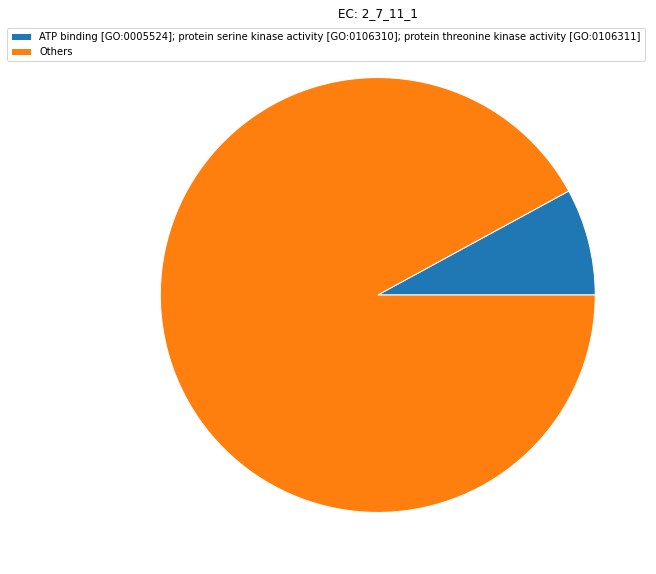

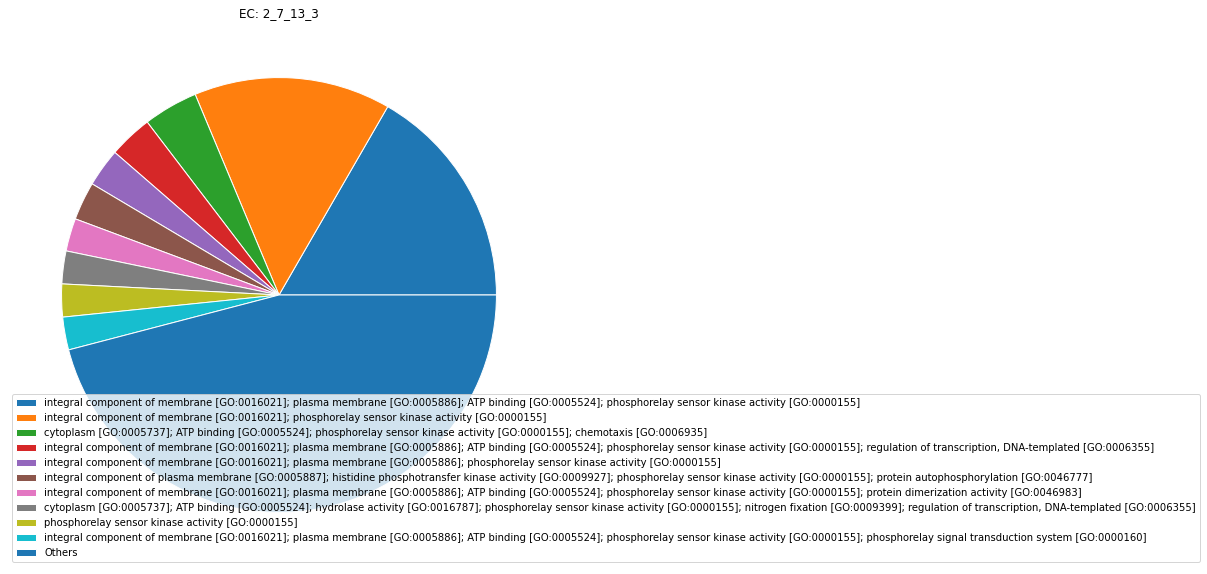

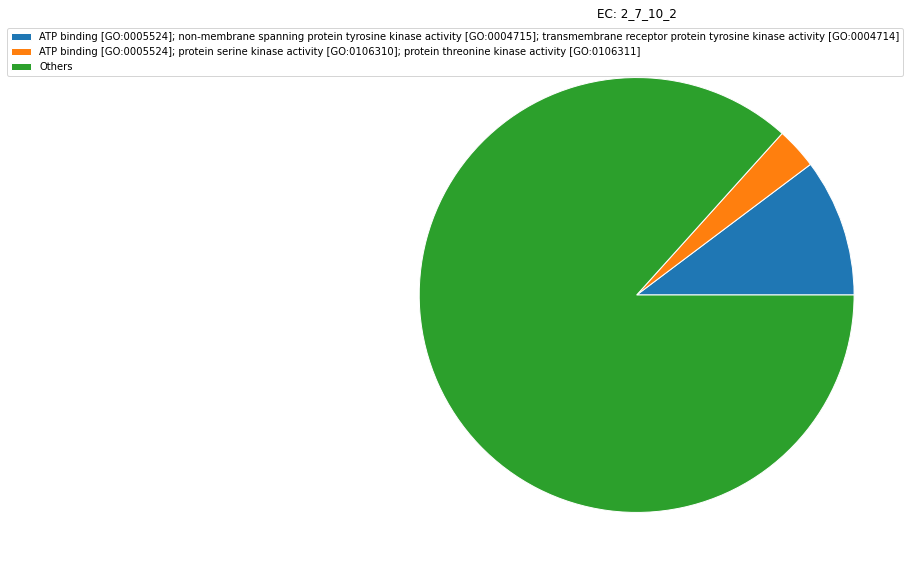

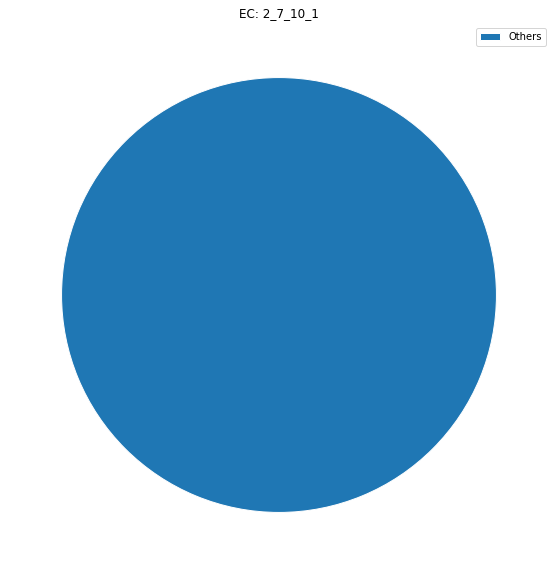

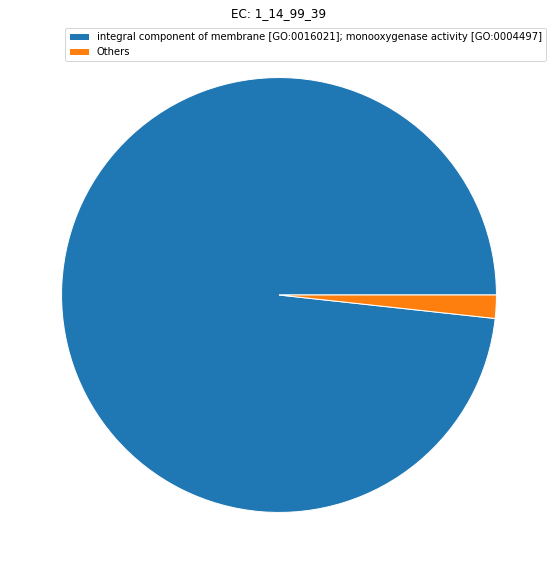

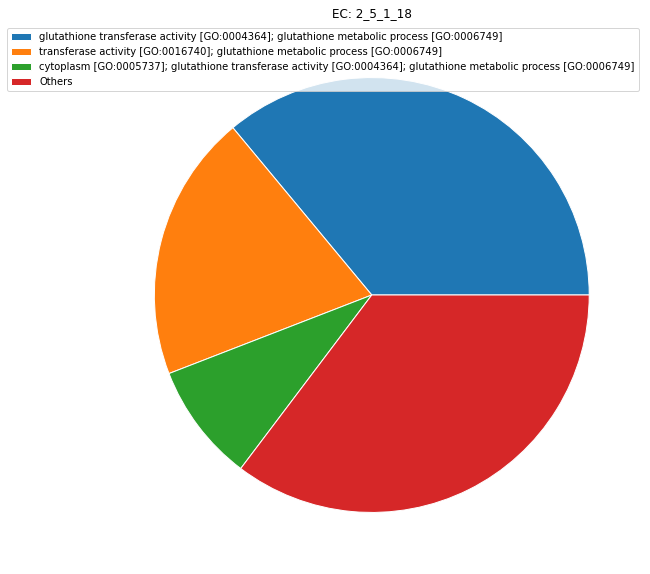

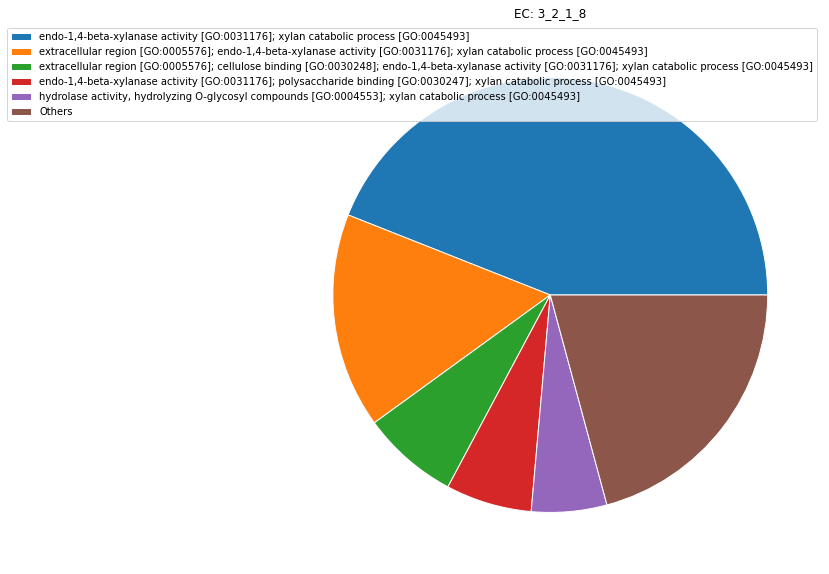

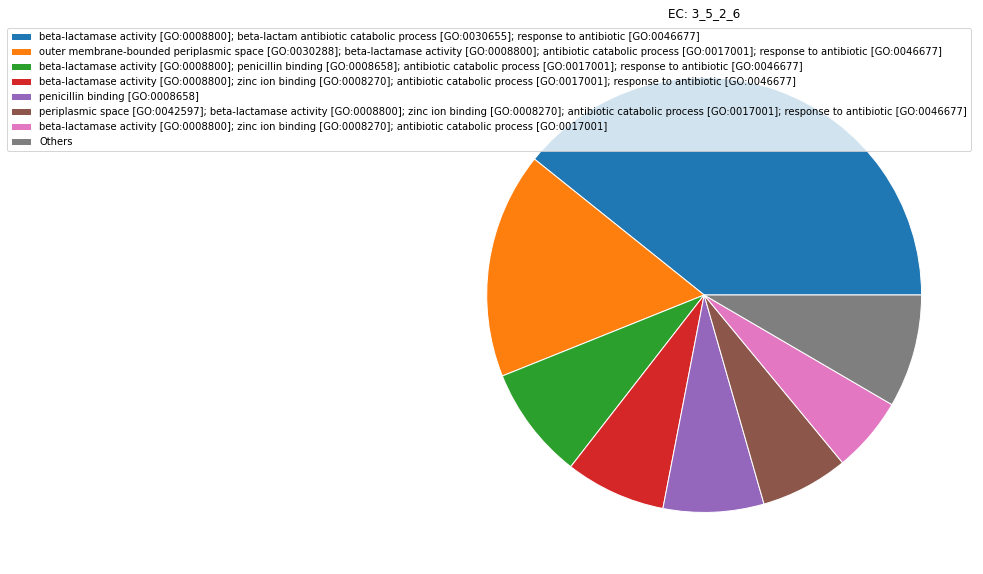

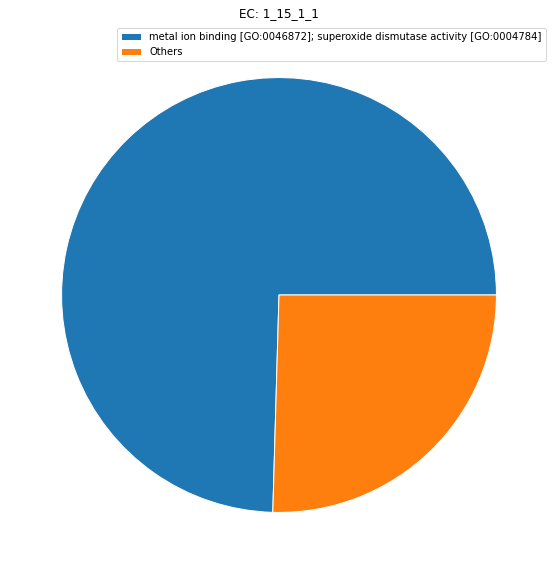

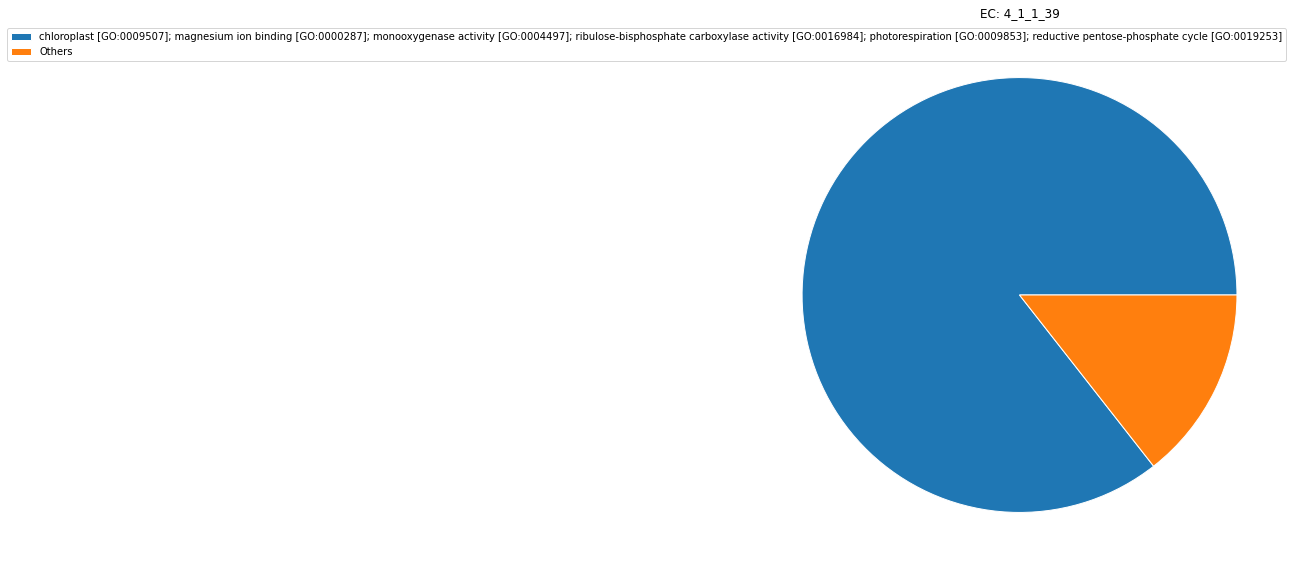

In [8]:



enzyme_cols = ['Entry', 'Gene_ontology_GO']

for ec in ec_top_10:

    df = pd.read_csv(f"../workflows/{ec}/csv/{ec}_uniprot.csv")

    #will count each appearance of particular pfam class 
    counters = defaultdict(int)

    df = df[enzyme_cols]

    interpro_counts = df['Gene_ontology_GO'].value_counts()
    #print(interpro_counts)

    for index, value in interpro_counts.items():

        if value <= 5:
            counters['Others'] += 1
        else:
            counters[index] = value 

    fig, ax = plt.subplots(figsize=(10,10))
    ax.pie(counters.values(), wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},rotatelabels = 45)
    ax.set_title(f'EC: {ec}')
    plt.legend(counters.keys())
    #plt.tight_layout()

# HOGENOM filtering

Only one tag is assigned per entry but can be used to sort into families possibily
Usually low annotations
Can't verify the credibility of this database
- Cross_reference_HOGENOM - 30.58% contain annot 

In [ ]:
df = pd.read_csv(f"../workflows/3_5_2_6/csv/3_5_2_6_uniprot.csv")

counts = df[['Cross_reference_HOGENOM']].value_counts()
print(counts)


def display_families_HOGENOM(ec_num: str, hog_tag:str):
    
    df = pd.read_csv(f"../workflows/{ec_num}/csv/{ec_num}_uniprot.csv")

    enzyme_cols = ['Entry', 'Protein_families', 'Cross_reference_HOGENOM']
    
    #will count each appearance of particular family  
    counters = defaultdict(int)

    df = df[enzyme_cols]
    print(df)
    
    #filters data frame to only include entries with tags matching the HOGENOM tag 
    filtered_df = df.loc[(df['Cross_reference_HOGENOM'] == hog_tag)]
  
    #record appearances of each family #draft
    family_counts = filtered_df['Protein_families'].value_counts()
               
    #place these values in a dict so that it's easier to plot below 
    for index, value in family_counts.items():
        counters[index] = value 
    
    #plot a histogram of family counts
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(counters.keys(), counters.values())
    plt.xticks(rotation='vertical')
    ax.set_xlabel('Family')
    ax.set_ylabel('# of entries')
    ax.set_title(f'Different families in {ec_num} using {hog_tag}')
    plt.show()
    
display_families_HOGENOM('3_5_2_6', 'CLU_009673_5_0_6;')

# Gene ontology GO method for comparision 
- Gene_ontology_GO - 97.25% annot: doesn't seem to be filtering based on protein families 
- Gene_ontology_IDs


In [ ]:
def filter_GO(ec_num: str, entry_limit: int,rm_outliers = True):
    """
    rm_outliers: condition that will remove any InterPro groups 
    that only have one entry in them 
    
    entry_limit: the minimum number of entries a tag must have to be included 
    """

    enzyme_cols = ['Entry', 'Gene_ontology_GO']

    df = pd.read_csv(f"../workflows/{ec_num}/csv/{ec_num}_uniprot.csv")

    #will count each appearance of particular interpro class 
    counters = defaultdict(int)
    df = df[enzyme_cols]
    
    #sorts values and also removes entries with no entries 
    counts = df['Gene_ontology_GO'].dropna().value_counts()
    
    filtered = dict()
    
    #filter out distant entries 
    if rm_outliers:
        for key, value in counts.items():
            if value > entry_limit:
                filtered[key] = value
    
    #record every IP tag 
    else:
        for key, value in counts.items():
            filtered[key] = value
 
    return filtered 


def calc_jaccard_GO(ec_num: str, threshold: float, filtered_counts, data_col):
  
    enzyme_cols = ['Entry', data_col]

    df = pd.read_csv(f"../workflows/{ec_num}/csv/{ec_num}_uniprot.csv")

    #will count each appearance of particular interpro class 
    counters = defaultdict(int)

    #splits interpro tags and creates a set to allow comparison of elements   
    #tag_list = [set(tag[-12:].split(';')) for tag in filtered_counts.keys()]
    
    tag_list = [tag.split(';') for tag in filtered_counts.keys()]
    
    short_form_tags = []
    
    for thing in tag_list:
        short_form = [x[-11:-1] for x in thing]
        short_form_tags.append(short_form)

            
    #initialise the similarity matrix
    distmat = np.zeros((len(short_form_tags), len(short_form_tags)))

    #cacluate JS at for each tag pair 
    for i in range(len(short_form_tags)):
        for j in range(i+1, len(short_form_tags)):
            
            A = set(short_form_tags[i])
            B = set(short_form_tags[j])

           
            intersection = A.intersection(B)

            union = A.union(B)
            
            #calculate Jaccard similarity 
            similarity = len(intersection)/len(union)
            
            #updates matrix 
            distmat[i, j] = distmat[j, i] = similarity 
    
    #record how many sequences have each type of IP tag, use for axis ticks 
    tag_counts = [str(value) + ' - '  \
                           + str(key)for key, value in filtered_counts.items()]

    #plot heatmat for reference 
    fig, ax = plt.subplots()
    plt.imshow(distmat, plt.cm.inferno, interpolation='nearest')
    plt.colorbar()
    plt.yticks(np.arange(len(tag_list)), tag_counts)
    plt.xticks(np.arange(len(tag_list)), [x for x in short_form_tags], rotation=90)
    plt.subplots_adjust(bottom=0.35)
    plt.title(f'{ec_num}: {data_col} Jaccard Similarity')
    plt.show()
    
    #IP names stored here so that loop below can reference name with matrix indices 
    interpro_names = [key for key in filtered_counts.keys()]
    
    #groupings of IP tags that are simililar will be stored here 
    similar_groups = []
    
    #iterate through each row in the matrix 
    for i in range(len(interpro_names)):
      
        #current row being compared to columns 
        key_group = str(interpro_names[i])
        
        #include group being compared as diagnonals will be zero 
        tag_group = [key_group]
        
        #compare every row to each column 
        for j in range(len(interpro_names)):
            
            #every column above or equal to threshold gets recorded 
            if distmat[i, j] >= threshold:
                tag_group.append(interpro_names[j])  
        
        similar_groups.append(tag_group)
        
    return similar_groups


In [ ]:
filtered_list = filter_GO('3_5_2_6', 4,  rm_outliers = True)

 
test = calc_jaccard_GO('3_5_2_6', 0.4, filtered_list, 'Gene_ontology_GO')



display_families3('3_5_2_6', test, 0, 'Gene_ontology_GO')
